In [2]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline

## Tabla resumen con información a nivel hogar

Esta tabla contiene las variables construidas, a partir de las 11 tablas de la base de datos, que permiten tener agrupada la información con la cual se obtienen los principales tabulados que el INEGI construye.

`CB`

In [3]:
file = "../../../../../../dataframes/envipe/TMod_Vic/df_09_concat.csv"


In [4]:
df = pd.read_csv(file)

In [5]:
df.shape

(5098, 119)

In [6]:
df_copy = df.copy()

In [7]:
df_copy.head()

,BP1_1,BP1_10_1,BP1_10_2,BP1_10_9,BP1_11,BP1_12_1,BP1_12_2,BP1_12_3,BP1_12_4,BP1_12_5,...,BP6_1,BP6_2,BP6_3,BP7_1,BPCOD,CVE_ENT,CVE_MUN,EDAD,ESTRATO,SEXO
0,11,1.0,0.0,0.0,5.0,1.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,5,9,2,NaN,2,NaN
1,12,1.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,5,9,2,NaN,2,NaN
2,11,1.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,5,9,2,NaN,3,NaN
3,12,1.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,5,9,2,NaN,3,NaN
4,6,1.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,5,9,2,NaN,3,NaN


In [8]:
df_copy.columns

Index(['BP1_1', 'BP1_10_1', 'BP1_10_2', 'BP1_10_9', 'BP1_11', 'BP1_12_1',
       'BP1_12_2', 'BP1_12_3', 'BP1_12_4', 'BP1_12_5',
       ...
       'BP6_1', 'BP6_2', 'BP6_3', 'BP7_1', 'BPCOD', 'CVE_ENT', 'CVE_MUN',
       'EDAD', 'ESTRATO', 'SEXO'],
      dtype='object', length=119)

In [9]:
df_09 = df.copy()

In [10]:
df_09.fillna(value=-1, inplace=True)

In [11]:
df_09.replace(to_replace=-1, value=np.NaN, inplace=True)

Text(0, 0.5, 'Observaciones')

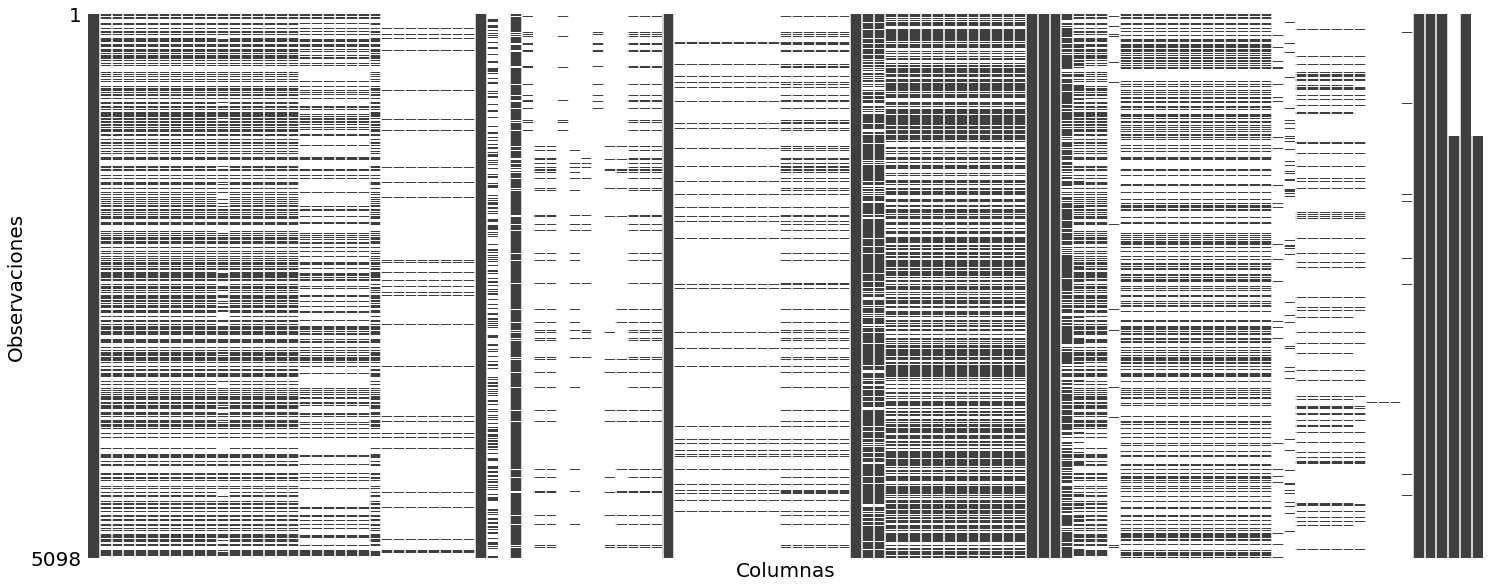

In [12]:
msno.matrix(df_09, fontsize=50, sparkline=False, labels=False)
plt.xlabel('Columnas', fontsize=20)
plt.ylabel('Observaciones', fontsize=20)
#plt.savefig('../../../images/envipe/df_tmod_vic_envipe2016_09.png', dpi=300)

Text(0, 0.5, 'Observaciones')

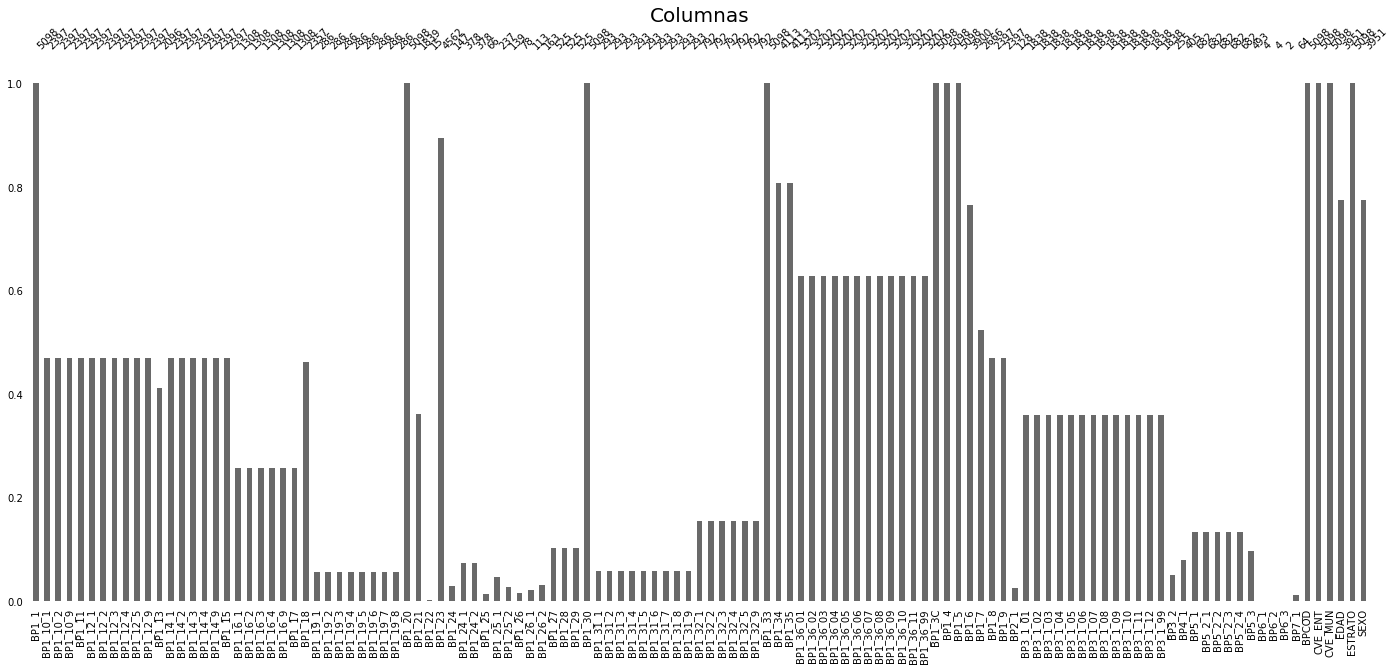

In [13]:
msno.bar(df_09, fontsize=10, labels=False)
plt.xlabel('Columnas', fontsize=20)
plt.ylabel('Observaciones', fontsize=20)
#plt.savefig('../../../images/envipe/df_tmod_vic_envipe2016_09.png', dpi=300)

In [14]:
df_09.replace(to_replace=np.NaN, value=-1, inplace=True)

In [15]:
df_09.columns[df_09.isnull().any()].tolist()

[]

In [14]:
threshold = round(df_09.shape[0]*.8)
threshold

4078

In [15]:
l = []
for column in df_09.columns:
    na_column =  df_09[column].value_counts().get(-1)
    if(na_column != None):
        if (df_09.shape[0] - na_column < threshold):
            print(column, ': ', df_09.shape[0] - na_column, ' - ', threshold, 'd e l e t e d')
            l.append(column)

In [29]:
df_09.shape

(5098, 14)

In [16]:
l

[]

In [19]:
df_09.drop(labels=l, axis=1, inplace=True)

In [20]:
df_09.fillna(value=-1, inplace=True)

In [21]:
df_09.replace(to_replace=-1, value=np.NaN, inplace=True)

Text(0, 0.5, 'Observaciones')

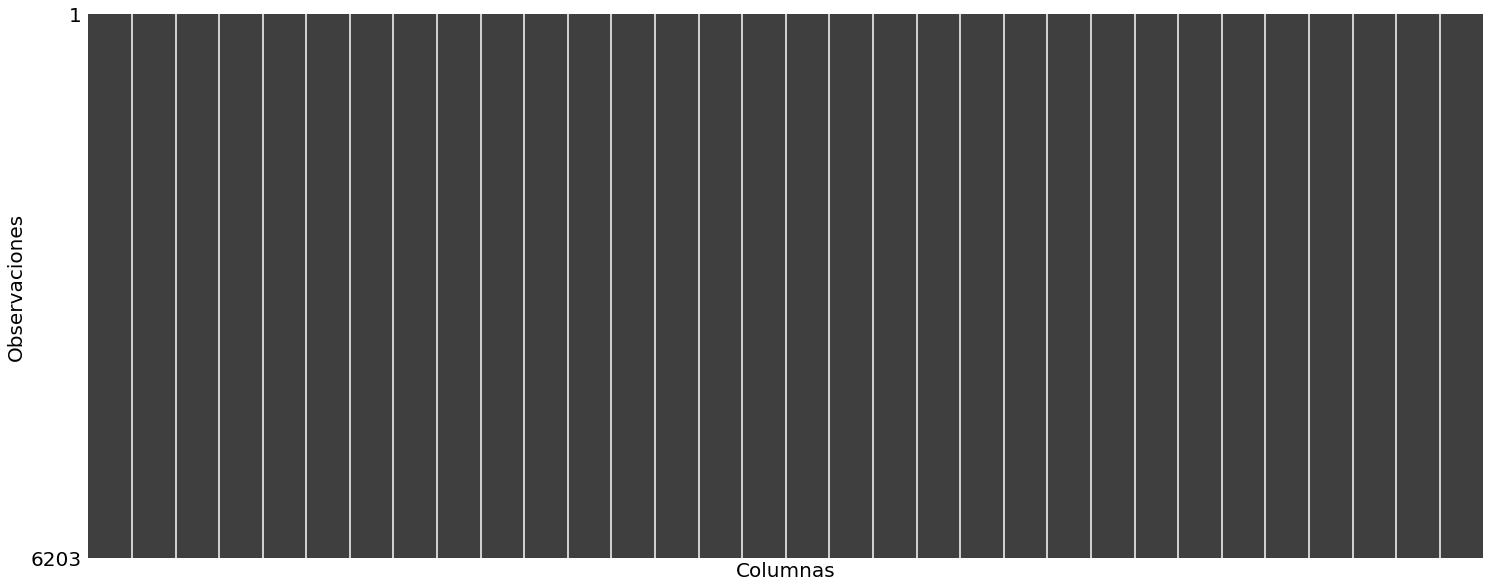

In [22]:
msno.matrix(df_09, fontsize=50, sparkline=False, labels=False)
plt.xlabel('Columnas', fontsize=20)
plt.ylabel('Observaciones', fontsize=20)
#plt.savefig('../../../images/envipe/df_tmod_vic_envipe2016_09.png', dpi=300)

Text(0, 0.5, 'Observaciones')

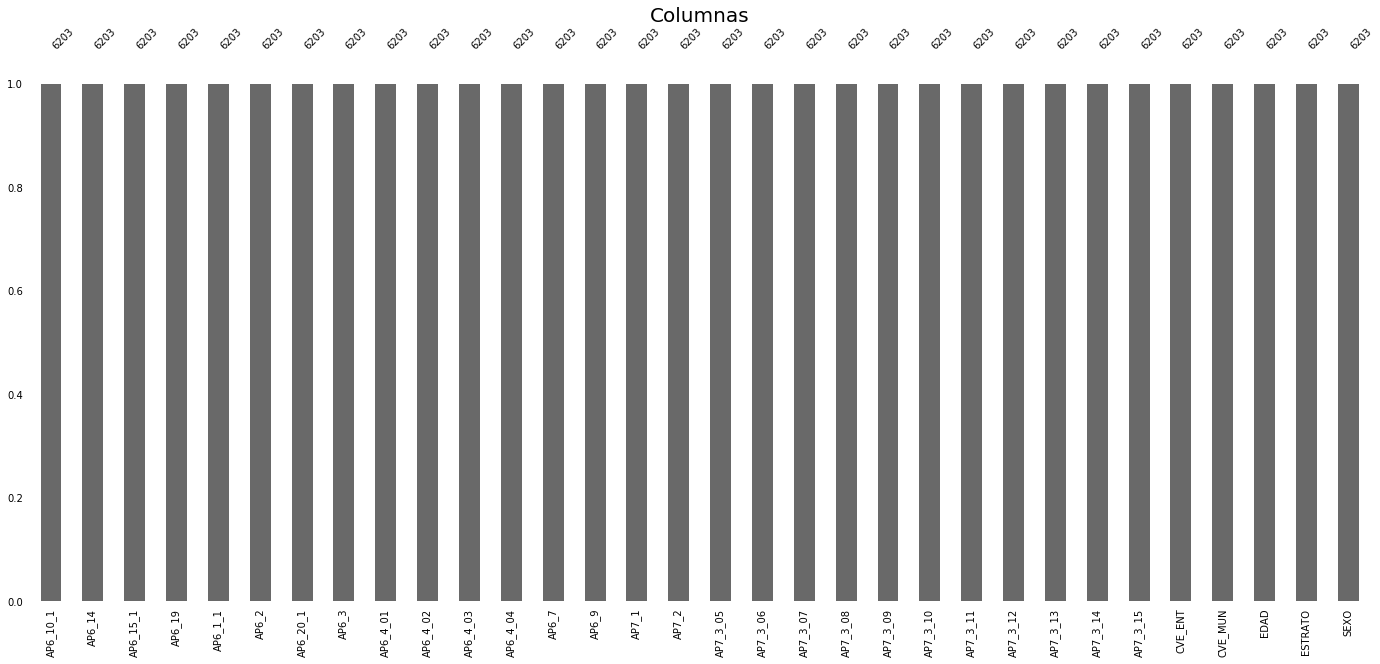

In [23]:
msno.bar(df_09, fontsize=10, labels=False)
plt.xlabel('Columnas', fontsize=20)
plt.ylabel('Observaciones', fontsize=20)
#plt.savefig('../../../images/envipe/df_tmod_vic_envipe2016_09.png', dpi=300)

In [30]:
file = "../../../../../../dataframes/envipe/TMod_Vic/df_09.csv"


In [31]:
df_09.shape

(5098, 14)

In [32]:
df_09.to_csv(file,index = False, header = True, sep = ',', encoding = 'utf-8')